In [82]:
 #detect time series using moving average
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [83]:
#read data
data = pd.read_csv('data/m16_cpu_usage_clean.csv')
data['time'] = pd.to_datetime(data['time'])

In [84]:
data.head()

,time,cpu_util
0,2017-11-05 02:00:00+00:00,0.279063
1,2017-11-05 02:05:00+00:00,0.274687
2,2017-11-05 02:10:00+00:00,0.293007
3,2017-11-05 02:15:00+00:00,0.290867
4,2017-11-05 02:20:00+00:00,0.288103


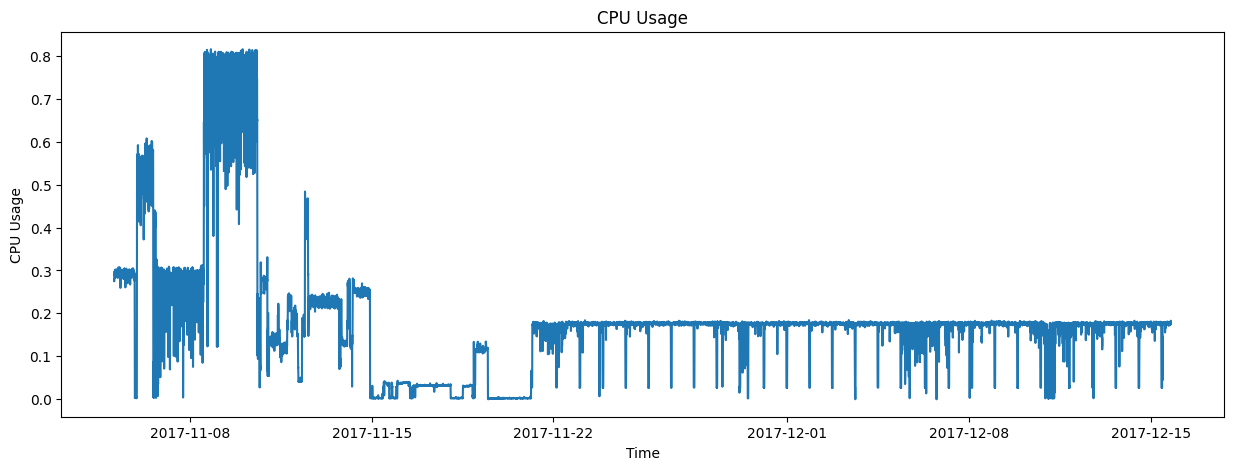

In [85]:
#plot data
plt.figure(figsize=(15, 5))
plt.plot(data['time'], data['cpu_util'])
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()


In [86]:
#moving average
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

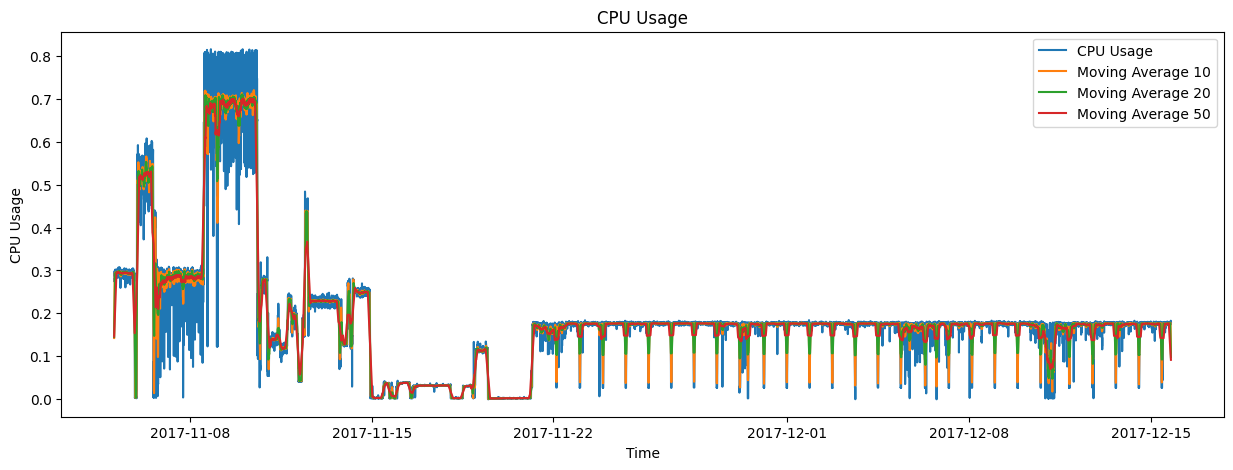

In [87]:
#plot moving average
plt.figure(figsize=(15,5))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 10), label='Moving Average 10')
plt.plot(data['time'], moving_average(data['cpu_util'], 20), label='Moving Average 20')
plt.plot(data['time'], moving_average(data['cpu_util'], 50), label='Moving Average 50')
plt.legend()
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()


In [88]:
#identify deviation
def identify_deviation(data, window_size, sigma):
    avg = moving_average(data, window_size).tolist()
    residual = data - avg
    std = np.std(residual)
    return np.where(residual > std*sigma, 1, 0)

In [89]:
#detect anomaly
def detect_anomaly(data, window_size, sigma):
    deviation = identify_deviation(data, window_size, sigma)
    index = np.where(deviation == 1)
    return index[0].tolist()


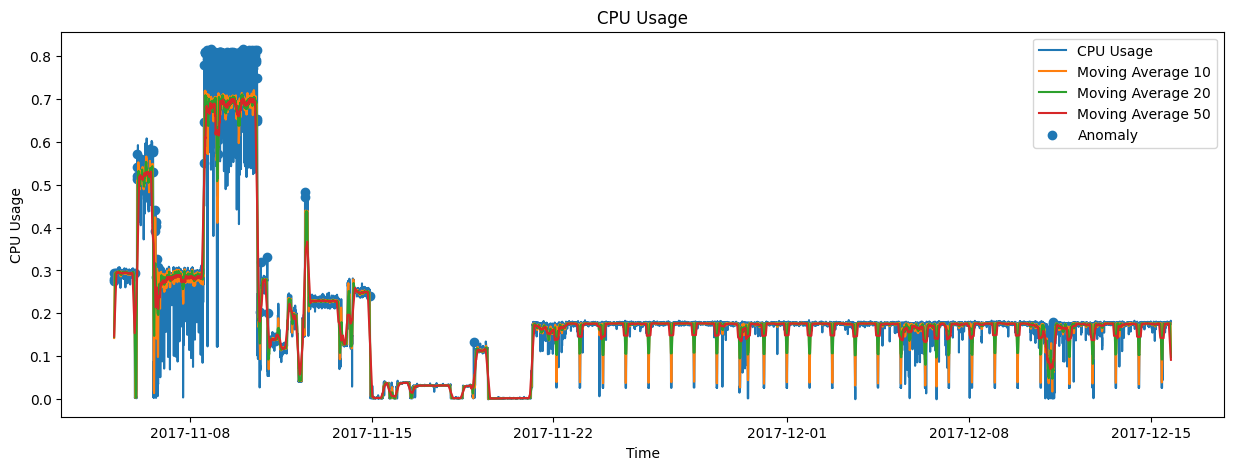

In [90]:
#plot anomaly
plt.figure(figsize=(15,5))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 10), label='Moving Average 10')
plt.plot(data['time'], moving_average(data['cpu_util'], 20), label='Moving Average 20')
plt.plot(data['time'], moving_average(data['cpu_util'], 50), label='Moving Average 50')
plt.scatter(data['time'][detect_anomaly(data['cpu_util'], 10, 3)], data['cpu_util'][detect_anomaly(data['cpu_util'], 10, 3)], label='Anomaly')
plt.legend()
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()


In [91]:
#label anomaly
data['anomaly'] = identify_deviation(data['cpu_util'], 10, 3)
data['anomaly'][0] = 0
data['anomaly'][1] = 0
data['anomaly'][2] = 0
data.head()

,time,cpu_util,anomaly
0,2017-11-05 02:00:00+00:00,0.279063,0
1,2017-11-05 02:05:00+00:00,0.274687,0
2,2017-11-05 02:10:00+00:00,0.293007,0
3,2017-11-05 02:15:00+00:00,0.290867,0
4,2017-11-05 02:20:00+00:00,0.288103,0


In [92]:
#get data from 2017-11-08 to 2017-11-09
new_data = data[(data['time'] >= '2017-11-08') & (data['time'] < '2017-11-09')]
new_data = new_data.reset_index(drop=True)


In [93]:
new_data.head()

,time,cpu_util,anomaly
0,2017-11-08 00:00:00+00:00,0.295173,0
1,2017-11-08 00:05:00+00:00,0.290257,0
2,2017-11-08 00:10:00+00:00,0.285033,0
3,2017-11-08 00:15:00+00:00,0.289440,0
4,2017-11-08 00:20:00+00:00,0.299747,0


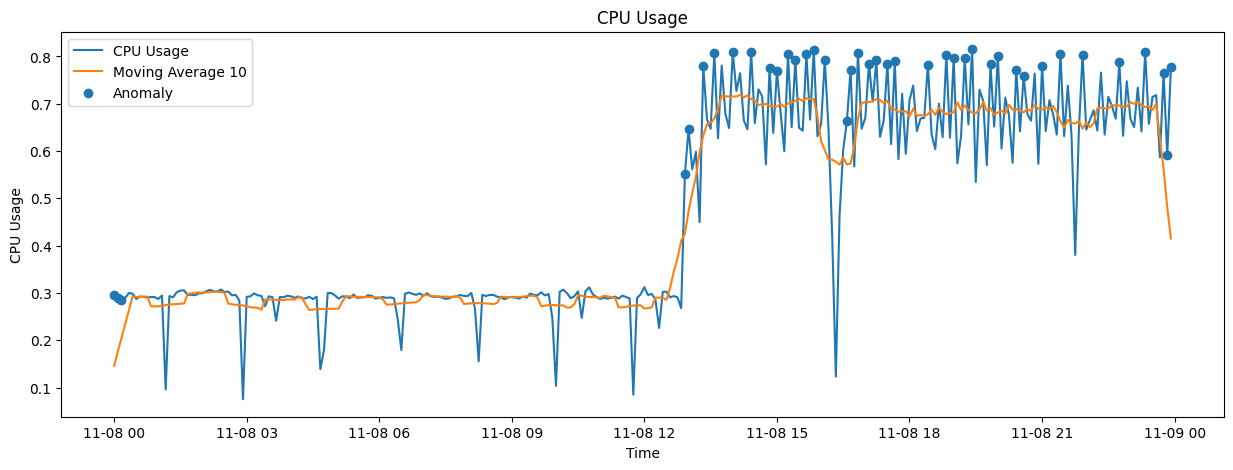

In [94]:
#plot anomaly with window size 10 and sigma 1
plt.figure(figsize=(15,5))
plt.plot(new_data['time'], new_data['cpu_util'], label='CPU Usage')
plt.plot(new_data['time'], moving_average(new_data['cpu_util'], 10), label='Moving Average 10')
plt.scatter(new_data['time'][detect_anomaly(new_data['cpu_util'], 10, 1)], new_data['cpu_util'][detect_anomaly(new_data['cpu_util'], 10, 1)], label='Anomaly')
plt.legend()
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()

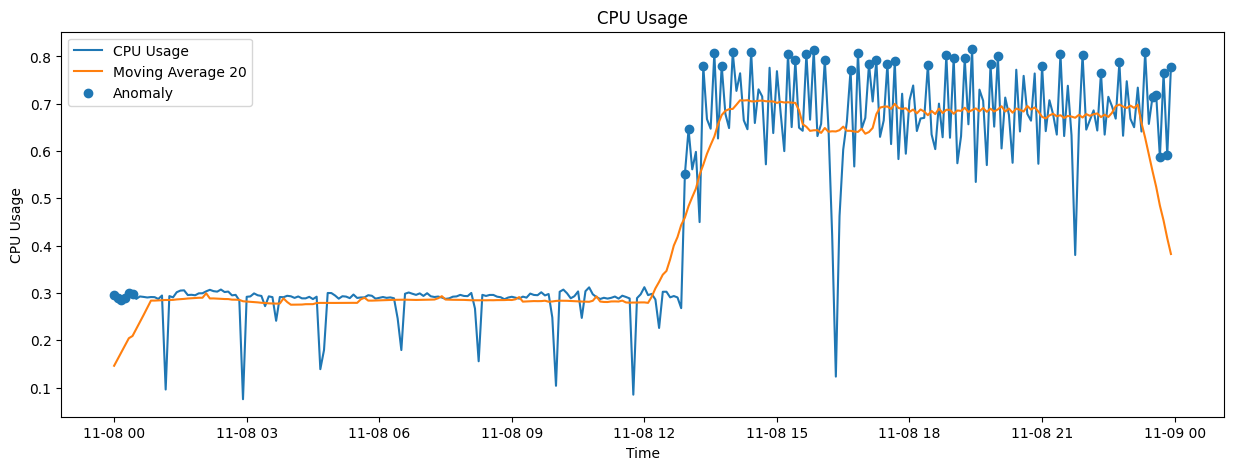

In [95]:
#plot anomaly with window size 20 and sigma 2
plt.figure(figsize=(15,5))
plt.plot(new_data['time'], new_data['cpu_util'], label='CPU Usage')
plt.plot(new_data['time'], moving_average(new_data['cpu_util'], 20), label='Moving Average 20')
plt.scatter(new_data['time'][detect_anomaly(new_data['cpu_util'], 20, 1)], new_data['cpu_util'][detect_anomaly(new_data['cpu_util'], 20, 1)], label='Anomaly')
plt.legend()
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()


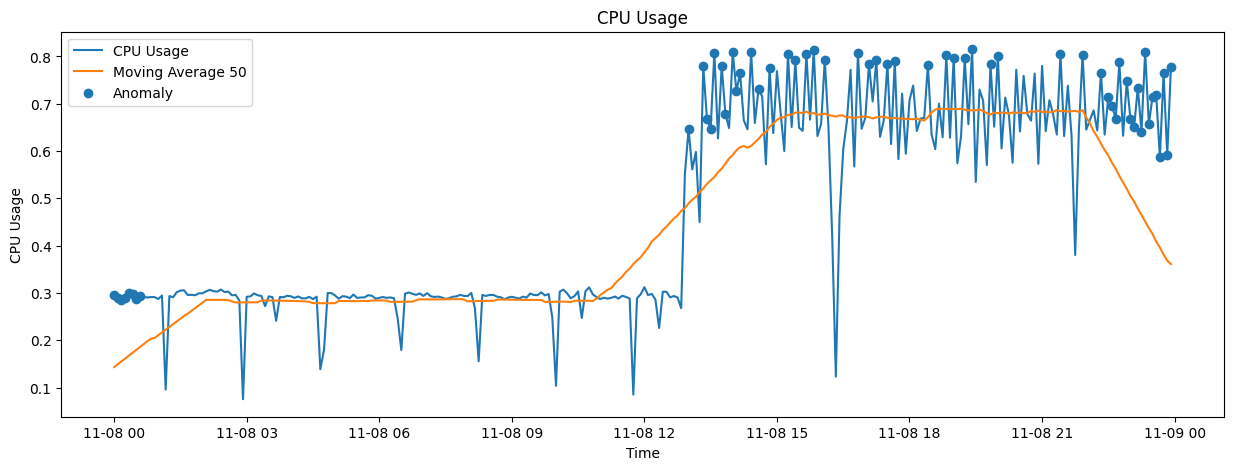

In [96]:
#plot anomaly with window size 50 and sigma 1
plt.figure(figsize=(15,5))
plt.plot(new_data['time'], new_data['cpu_util'], label='CPU Usage')
plt.plot(new_data['time'], moving_average(new_data['cpu_util'], 50), label='Moving Average 50')
plt.scatter(new_data['time'][detect_anomaly(new_data['cpu_util'], 50, 1)], new_data['cpu_util'][detect_anomaly(new_data['cpu_util'], 50, 1)], label='Anomaly')
plt.legend()
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()


In [97]:
#get data from 2017-11-08 to 2017-11-12
new_data2 = data[(data['time'] >= '2017-11-08') & (data['time'] < '2017-11-12')]
new_data2 = new_data2.reset_index(drop=True)

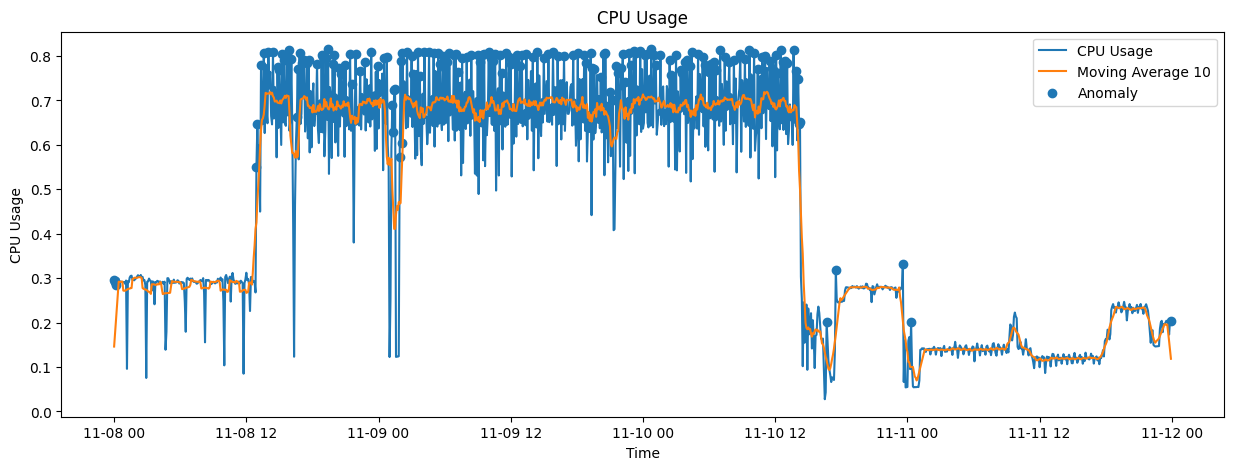

In [98]:
#plot anomaly with window size 10 and sigma 1
#zoomable
plt.figure(figsize=(15,5))
plt.plot(new_data2['time'], new_data2['cpu_util'], label='CPU Usage')
plt.plot(new_data2['time'], moving_average(new_data2['cpu_util'], 10), label='Moving Average 10')
plt.scatter(new_data2['time'][detect_anomaly(new_data2['cpu_util'], 10, 1)], new_data2['cpu_util'][detect_anomaly(new_data2['cpu_util'], 10, 1)], label='Anomaly')
plt.legend()
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()



In [99]:
#get data from 2017-11-08 12:00:00 to 2017-11-10 18:00:00
new_data3 = data[(data['time'] >= '2017-11-08 12:00:00') & (data['time'] < '2017-11-10 18:00:00')]
new_data3 = new_data3.reset_index(drop=True)

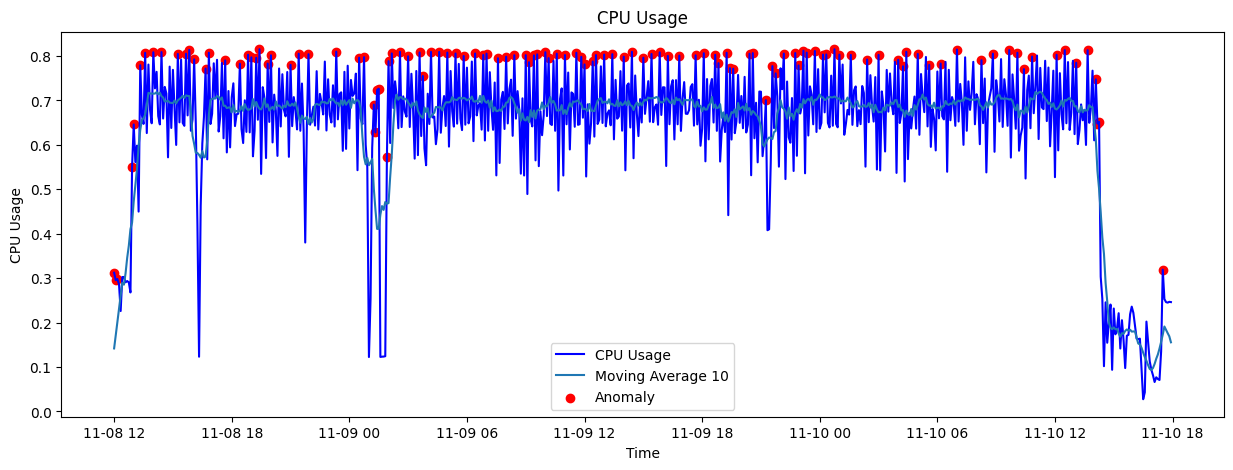

In [100]:
#plot anomaly with window size 10 and sigma 1
#zoomable
plt.figure(figsize=(15,5))
plt.plot(new_data3['time'], new_data3['cpu_util'], label='CPU Usage', color='blue')
plt.plot(new_data3['time'], moving_average(new_data3['cpu_util'], 10), label='Moving Average 10')
plt.scatter(new_data3['time'][detect_anomaly(new_data3['cpu_util'], 10, 1)], new_data3['cpu_util'][detect_anomaly(new_data3['cpu_util'], 10, 1)], label='Anomaly', color='red')
plt.legend()
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()

In [81]:
#save the data as csv
data.to_csv('data/m16_cpu_usage_detect.csv', index=False)

In [101]:
#generate new data with time
new_date = pd.date_range(start='2017-11-08 02:00:00+00:00', end='2017-11-08 11:00:00+00:00', freq='5min')
#create new_Cpu data with np random uniform in range 0.0 to 1.0 every 5 minutes
# new_cpu = np.random.uniform(0.0, 1.0, size=len(new_date))
# new_cpu[0] = 0.35
new_cpu = np.array([
  0.35,
  0.385,
  0.4,
  0.35,
  0.385,
  0.4,
  0.35,
  0.385,
  0.4,
  0.32,
  0.35,
  0.358,
  0.363,
  0.385,
  0.4,
  0.32,
  0.35,
  0.385,
  0.4,
  0.32,
  0.35,
  0.385,
  0.4,
  0.32,
  0.1,
  0.8,
  0.82,
  0.79,
  0.8,
  0.78,
  0.6,
  0.73,
  0.65,
  0.74,
  0.684,
  0.75,
  0.690,
  0.2,
  0.15,
  0.24,
  0.234543,
  0.265,
  0.32,
  0.2,
  0.15,
  0.24,
  0.26,
  0.265,
  0.32,
  0.2,
  0.15,
  0.24,
  0.233,
  0.265,
  0.32,
  0.7,
  0.8,
  0.82,
  0.79,
  0.8,
  0.78,
  0.7,
  0.8,
  0.82,
  0.79,
  0.8,
  0.78,
  0.7,
  0.8,
  0.82,
  0.79,
  0.8,
  0.78,
  0.5,
  0.4,
  0.43,
  0.1,
  0.123,
  0.15,
  0.1,
  0.23,
  0.16,
  0.14,
  0.123,
  0.15,
  0.1,
  0.123,
  0.15,
  0.64,
  0.62,
  0.61,
  0.60,
  0.632,
  0.65,
  0.63,
  0.60,
  0.632,
  0.85,
  0.63,
  0.80,
  0.94,
  0.95,
  0.952423,
  0.923,
  0.9,
  0.1,
  0.6,
  0.45,
  0.45,
])

new_date.shape, new_cpu.shape

((109,), (109,))

In [102]:
#generate new data
new_data = pd.DataFrame({'time': new_date, 'cpu_util': new_cpu})
new_data.head()

,time,cpu_util
0,2017-11-08 02:00:00+00:00,0.350
1,2017-11-08 02:05:00+00:00,0.385
2,2017-11-08 02:10:00+00:00,0.400
3,2017-11-08 02:15:00+00:00,0.350
4,2017-11-08 02:20:00+00:00,0.385


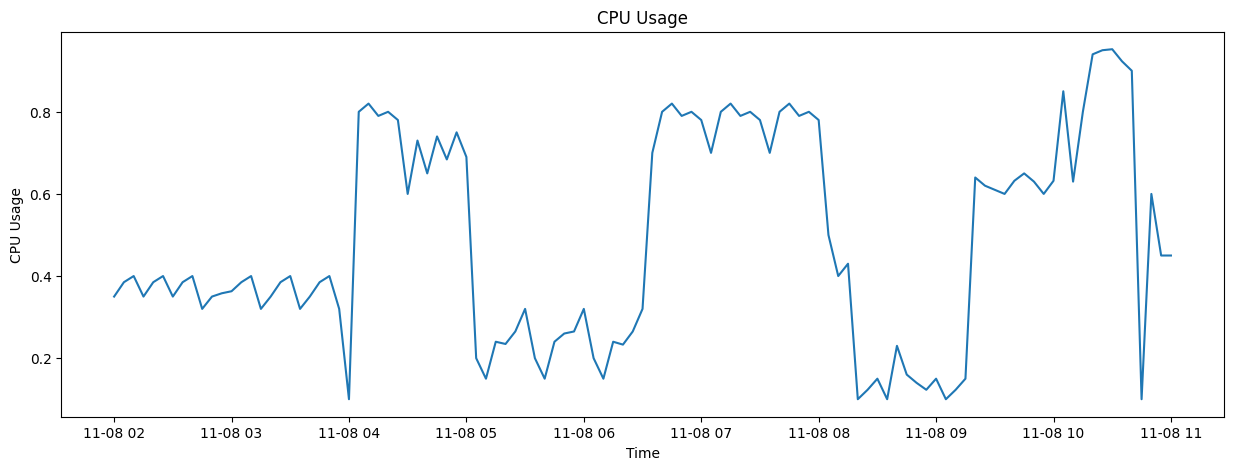

In [103]:
#plot new data
plt.figure(figsize=(15,5))
plt.plot(new_data['time'], new_data['cpu_util'])
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()

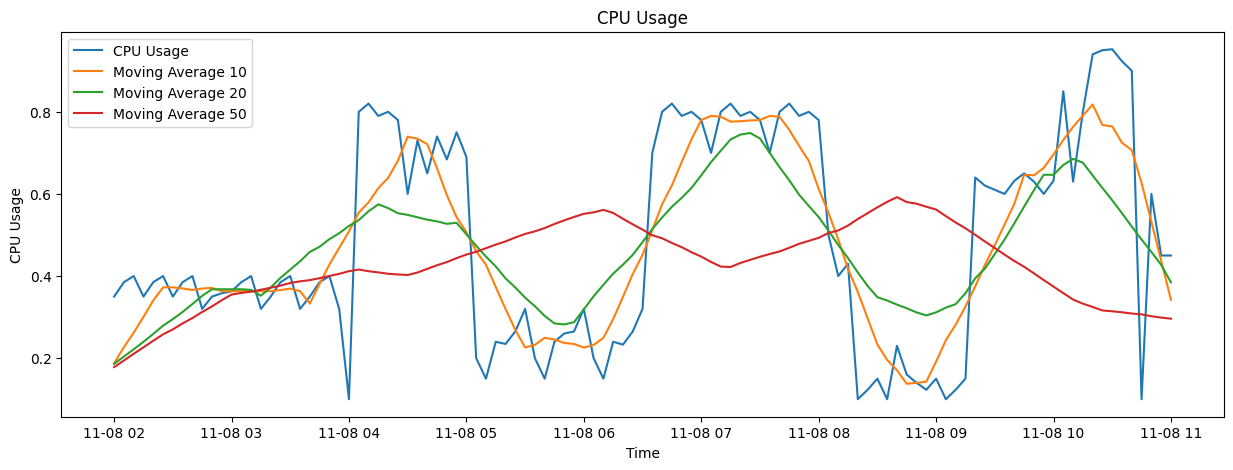

In [105]:
#plot new data with moving average
plt.figure(figsize=(15,5))
plt.plot(new_data['time'], new_data['cpu_util'], label='CPU Usage')
plt.plot(new_data['time'], moving_average(new_data['cpu_util'], 10), label='Moving Average 10')
plt.plot(new_data['time'], moving_average(new_data['cpu_util'], 20), label='Moving Average 20')
plt.plot(new_data['time'], moving_average(new_data['cpu_util'], 50), label='Moving Average 50')
plt.legend()
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()


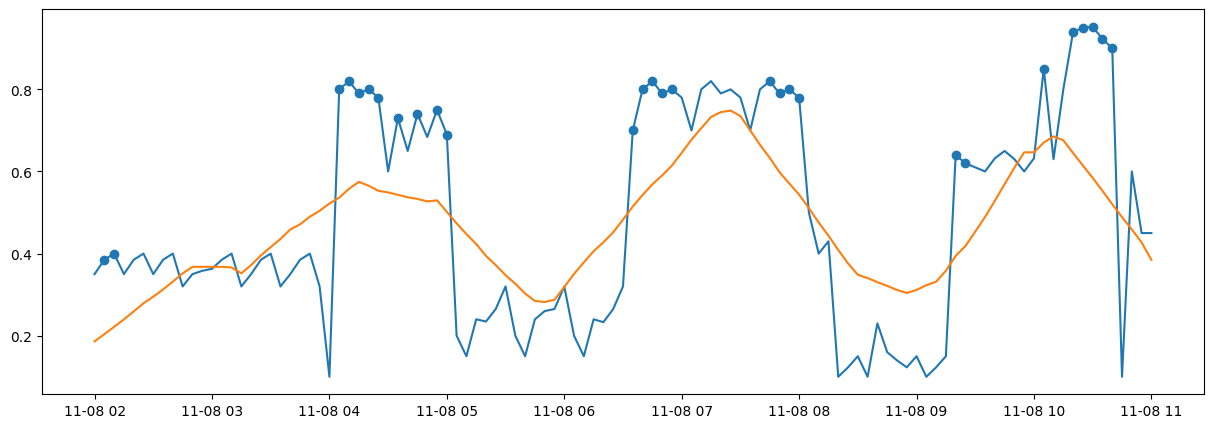

In [107]:
#plot new data with moving average and anomaly
plt.figure(figsize=(15,5))
plt.plot(new_data['time'], new_data['cpu_util'], label='CPU Usage')
plt.plot(new_data['time'], moving_average(new_data['cpu_util'], 20), label='Moving Average 20')
plt.scatter(new_data['time'][detect_anomaly(new_data['cpu_util'], 20, 1)], new_data['cpu_util'][detect_anomaly(new_data['cpu_util'], 20, 1)], label='Anomaly')
